In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import scipy.optimize as sopt
import pandas as pd
from pyomo.environ import *
from idaes.core.solvers import get_solver

(181, 2)


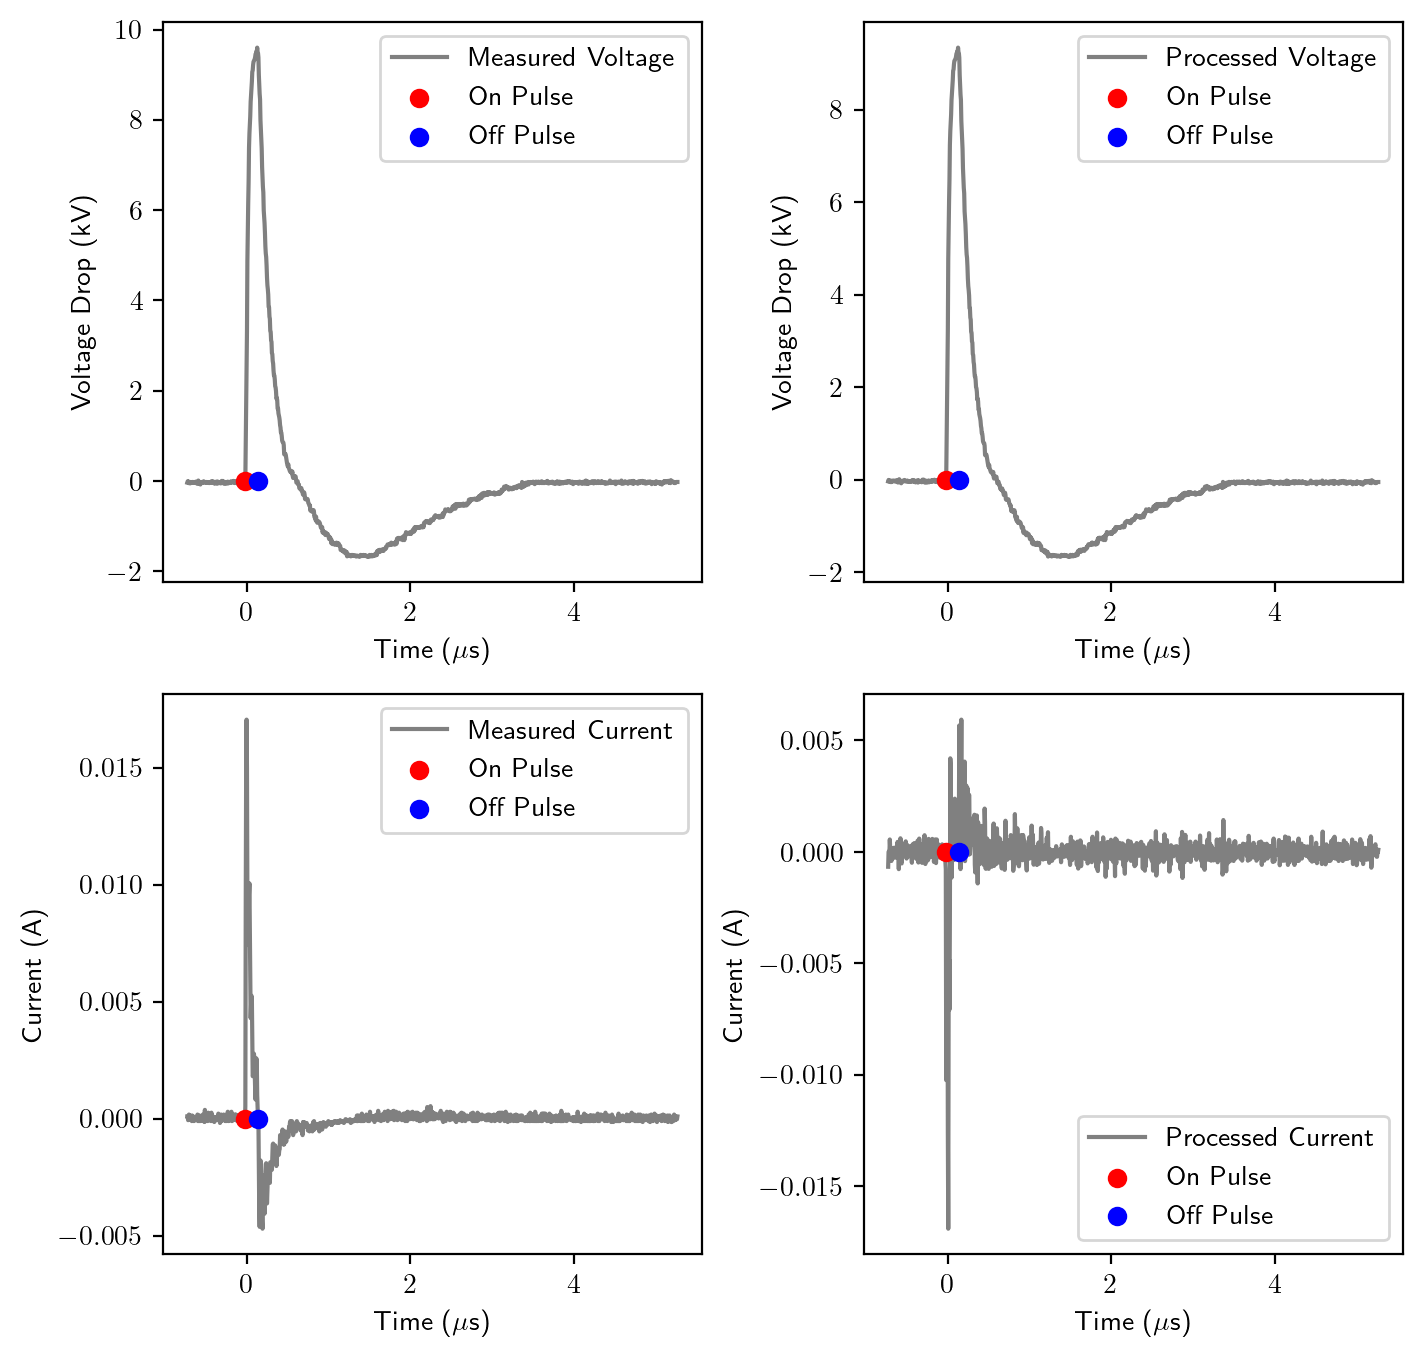

In [2]:
import numpy as np
import matplotlib
import sys
sys.path.append("Users\\vvmil\\AppData\\Local\\Programs\\MiKTeX")
sys.path.append(r"C:\Users\vvmil\Documents\Python_Vmil\Jupyter_Notebooks\Plasma_He_calcs_cleanup\He_code_new\plotting_notebooks")
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from PyDBDdim.utils import DatasetProcess

# Load the dataset
DBD1 = DatasetProcess(r'C:\Users\vvmil\Documents\Python_Vmil\Jupyter_Notebooks\Plasma_He_calcs\data\data_packing\data_2cm_23mm_packing\Mesbah-DBD')
time_col1, _1 = DBD1.current_segment()
time_col1 = np.array(time_col1)
t_index1 = np.array(_1)
Vipab1, Qab1 = DBD1.get_two_region_VI()
print(Vipab1.shape)

number = 3

# Check signals
cs_V = DBD1.check_signal_vvm(number, "V", plotting=False)
cs_I = DBD1.check_signal_vvm(number, "I", plotting=False)
cps_V = DBD1.check_processed_signal_vvm(number, "V", plotting=False)
cps_I = DBD1.check_processed_signal_vvm(number, "I", plotting=False)

font = {'family': 'serif',
        'color': 'Black',
        'weight': 'normal',
        'size': 18}

colors = ['red', 'blue', 'green']

fig, axes = plt.subplots(2, 2, sharey=False, figsize=(8, 8))
axes = axes.flatten()

pulse_type = ['On Pulse', 'Off Pulse']

# Plot the raw and processed signals
axes[0].plot(cs_V['times'] * 1e6, cs_V['voltage'], color='grey', zorder=0, label=' Measured Voltage')
for i in range(len(cs_V['marker_x']) - 1):
    axes[0].scatter(cs_V['marker_x'][i] * 1e6, cs_V['marker_y'][i], color=colors[i], zorder=i, label=pulse_type[i]) #label=f'Marker {i+1}'
axes[0].set_ylabel('Voltage Drop (kV)')
axes[0].set_xlabel(r'Time ($\mu$s)')
axes[0].legend()

axes[2].plot(cs_I['times'] * 1e6, cs_I['current'], color='grey', zorder=0, label='Measured Current')
for i in range(len(cs_I['marker_x']) - 1):
    axes[2].scatter(cs_I['marker_x'][i] * 1e6, cs_I['marker_y'][i], color=colors[i], zorder=i, label=pulse_type[i])
axes[2].set_ylabel('Current (A)')
axes[2].set_xlabel(r'Time ($\mu$s)')
axes[2].legend()

axes[1].plot(cps_V['times'] * 1e6, cps_V['voltage'] / 1000, color='grey', zorder=0, label='Processed Voltage')
for i in range(len(cps_V['marker_x']) - 1):
    axes[1].scatter(cps_V['marker_x'][i] * 1e6, cps_V['marker_y'][i], color=colors[i], zorder=i, label=pulse_type[i])
axes[1].set_xlabel(r'Time ($\mu$s)')
axes[1].set_ylabel('Voltage Drop (kV)')
axes[1].legend()

axes[3].plot(cps_I['times'] * 1e6, -1 * cps_I['current'], color='grey', zorder=0, label='Processed Current')
for i in range(len(cps_I['marker_x']) - 1):
    axes[3].scatter(cps_I['marker_x'][i] * 1e6, cps_I['marker_y'][i], color=colors[i], zorder=i, label=pulse_type[i])
axes[3].set_xlabel(r'Time ($\mu$s)')
axes[3].set_ylabel('Current (A)')
axes[3].legend()

plt.subplots_adjust(wspace=0.3)  # Increase the width spacing

plt.savefig('measurement.png', dpi=600)
plt.show()
